<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/SP/Hydrogen_measurements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6> Hydrogen wavelengths measurements</font>

Evgeny Kolonsky, Oct 2024

v.0.2.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from math import degrees as deg

# Model

Theoretical expression for light diffraction when incident light assumed to be perpendicutalr to lattice is
$$
n \lambda = d \sin \beta_n,
\tag{1}
$$
where $\lambda$ - light wave length, $d$ - diffraction grating parameter, $n$ - order number, $\beta_n$ - deviation angle of order $n$ light beam.

When incident light falls under an arbitrary angle $\alpha_0$ to lattice plane perpendicular, the expression is written in form
$$ 2 d \sin\frac{\beta_n}{2} \cos\left(\alpha_0 +\frac{\beta_n}{2}\right)
= n \lambda
, \quad n =  \pm 1, \pm 2, ..
\tag{2}
$$
Here $\beta_n$ is the angle between incident light beam and  deviated beam of order $n$, which we can measure rather accurately in optical spectroscopy experiment.

For $\alpha_0=0$ (light falls ⟂) we receive eq.(1).

Otherwise we expect to see non-symmetry in deviation angles $\beta_{\pm n}$ .

## Lattice angle position


We can neither ensure $\alpha_0=0$ nor accurately measure $\alpha_0$ directly due to construction of the experiment set.

The unknown angle $\alpha_0$ between lattice plane perpendicular and light beam can be found indirectly by measuring $\beta_{\pm 1}$, even when lattice period $d$ and wavelength $\lambda$ are also unknown. For a pair $\pm n$ using eq.(2) we have  
$$
\sin \frac{\beta_{+n}}{2} \cos\left( \alpha_0 + \frac{\beta_{+n}}{2}\right) + \sin \frac{\beta_{-n}}{2} \cos\left( \alpha_0 + \frac{\beta_{-n}}{2}\right) =0.   
$$
We have one equation with one unknown parameter $\alpha_0$. It can be easiliy solved analytically. Denoting for first series $n=\pm1$
$$
c_{1} = \cos\frac{\beta_{+1}}{2}, \quad s_{1} = \sin\frac{\beta_{+1}}{2}, \\
c_{2} = \cos\frac{\beta_{-1}}{2}, \quad s_{2} = \sin\frac{\beta_{-1}}{2}, \\
C = c_{1} s_{1} + c_{2} s_{2}, \quad
D = s_{1}^2 + s_{2}^2
$$
we found
$$
\alpha_0 = \arccos\frac{D}{\sqrt{C^2+D^2}}.
$$
Since we measure $\beta_n$ rather accurately, accuracy of $\alpha_0$ is also reasonably high. Uncertainty of $\alpha_0$ can be decreased further by averaging $\alpha_0$ for all known pairs.  

## Digital simulation

In [2]:
# calculate
def get_alpha0(beta_plus, beta_minus):
  c1 = np.cos(beta_plus/2)
  s1 = np.sin(beta_plus/2)
  c2 = np.cos(beta_minus/2)
  s2 = np.sin(beta_minus/2)
  D = s1*s1 + s2*s2
  C = c1*s1 + c2*s2
  acos = D / np.sqrt(C*C + D*D)
  alpha0_arr = np.arccos(acos)
  alpha0 = np.mean(alpha0_arr)
  alpha0_err = np.std(alpha0_arr) / np.sqrt(len(alpha0_arr) - 1)
  return alpha0, alpha0_err



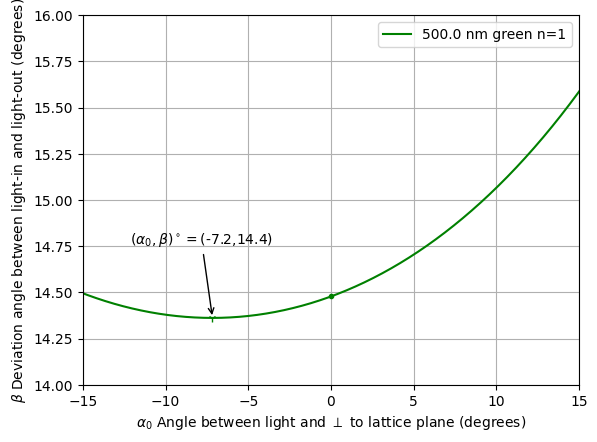

In [3]:
N = 1000

d = 2e-6
n = 1
lm = 500e-9 # green

func = lambda beta: 2* np.sin(beta/180*np.pi /2) * np.cos((a0 + beta/2)/180*np.pi ) - n * lm / d
beta_initial_guess = 0

beta = []
a0_arr = np.linspace(-45, 45, N)
for a0 in a0_arr:

  beta_solution = fsolve(func, beta_initial_guess)[0]
  beta.append(beta_solution)
beta = np.array(beta)
arrowprops=dict(arrowstyle="->", facecolor='gray', linewidth=1)

plt.plot(a0_arr, beta, '-', color='green', label=f'{lm*1e9} nm green n=1')
ix = np.argmin(beta)
plt.plot(a0_arr[ix], beta[ix], '1', color='green')
(x, y) = a0_arr[ix], beta[ix]
plt.annotate( rf'$(\alpha_0, \beta)^\circ = $({a0_arr[ix]:.1f},{beta[ix]:.1f})', xy=(x,y), xytext=(x-5, y+0.4),
             arrowprops=arrowprops)

#
a0 = 0
beta_zero = fsolve(func, beta_initial_guess)[0]
plt.plot(a0, beta_zero, '.', color='green')



plt.xlabel(r'$\alpha_0$ Angle between light and $\perp$ to lattice plane (degrees)')
plt.ylabel(r'$\beta$ Deviation angle between light-in and light-out (degrees)')

plt.ylim(14 , 16 )
plt.xlim(-15 , 15 )
#plt.yscale('log')
plt.grid()
plt.legend()

**Conclusion**

Variations in lattice angle $\alpha_0$ in order of degrees near zero lead to variations in deviation angle $\beta$ in order of $10^{-1}$, i.e. third or even second meaningful digit.

Therefore neglecting lattice plane rotation leads to systematic value estimation error in order $10^0 - 10^1$ nm for visible light having wavelengths of order $10^2 $ nm.



# Measurements

## Set #2

Measuring lattice parameter $d$ with Mercury lamp

Measured with spectrograph

![H](https://github.com/tphlabs/data/blob/main/Lab4_SP/mercury.png?raw=true')

In [ ]:
# lattice parameter estimation with Merucry green line

measurements = '''
# beta(degrees) order color_index
# green
-15.435 -1  0
16.155 1 0
# violet
-12.42 -1 1
12.96 1 1
# weak (? violet)
-24.84 -2 1
26.64 2 1
# yellow
-16.785 -1 2
17.37 1 2
'''

beta, n, color_index = np.genfromtxt(measurements.splitlines(), unpack=True)

beta *= np.pi / 180

beta1 = beta[beta<0]
beta2 = beta[beta > 0]

alpha0, alpha0_err = get_alpha0(beta1, beta2)
print(f'alpha0: {deg(alpha0):.1f} ± {deg(alpha0_err):.1f} degree')

beta_green = beta[color_index == 0]
n_green = n[color_index == 0]
lmbd_green = 545e-9 #m
d_arr = n_green * lmbd_green / ( 2 * np.sin(beta_green/2) * np.cos(alpha0 + beta_green/2) )
d = np.mean(d_arr)
d_err = np.std(d_arr) / np.sqrt(len(d_arr) - 1)
print(rf'd = {d *1e6:.2f} ± {d_err*1e6:.2f} um')


alpha0: 8.5 ± 0.9 degree
d = 2.03 ± 0.00 um


>  **Conclusion**
>
> Calculating lattice constant $d$ having few measurement points leads to a rather high uncertainty. Therefore we will take nominal $d$ value for further steps.

Hydrogen

Measured with spectrograph

![H](https://github.com/tphlabs/data/blob/main/Lab4_SP/hydrogen.png?raw=true')

In [ ]:
colors = ['Violet 434', 'Cian 486', 'Red 657']

# set2 lattice parameter
d = 2e-6 #m
print(rf'Set 2 Nominal d = {d*1e6:.2f} um')

measurements = '''
# beta(degrees) order color_index
# violet color=0
-12.33 -1 0
12.735 1 0
# cian strong, color=1
-14.175 -1 1
14.31 1 1
29.655 +2 1
# red strong, color=2
-19.26 -1 2
19.485 1 2
42.03 +2 2
# weak - not identified
#-28.845 -2
#-46.71
#26.01
'''

beta, n, color_index = np.genfromtxt(measurements.splitlines(), unpack=True)
beta *=  np.pi/180

beta1 = beta[n == -1]
beta2 = beta[n == +1]

alpha0, alpha0_err = get_alpha0(beta1, beta2)
print(rf'alpha0 = {deg(alpha0):.1f} ± {deg(alpha0_err):.1f} degree')

for ix in range(3):
  b = beta[color_index == ix]
  n_ix =  n[color_index == ix]
  lmbd = 2 * d *  np.sin(b / 2) * np.cos(alpha0 + b / 2) /n_ix
  lmbd_mean = np.mean(lmbd)
  lmbd_err = np.std(lmbd) / np.sqrt(len(lmbd) - 1)
  lmbd_n = len(lmbd)
  print(rf'{colors[ix]:<15}: lambda = {lmbd_mean*1e9:.0f} ± {lmbd_err*1e9:.0f}nm, {lmbd_n:d} points' )

Set 2 Nominal d = 2.00 um
alpha0 = 4.1 ± 2.1 degree
Violet 434     : lambda = 433 ± 3nm, 2 points
Cian 486       : lambda = 489 ± 2nm, 3 points
Red 657        : lambda = 658 ± 5nm, 3 points


## Set #3

lattice parameter $d$

In [ ]:
# Mercury green line
lmbd = 545e-9 #m
measurements = '''
# beta(degrees) order color_index
# green
-19.26 -1 0
18.99 1 0
# green weak 2
-44.235 -2 0
39.51 2 0
'''

beta, n, color_index = np.genfromtxt(measurements.splitlines(), unpack=True)

beta *= np.pi / 180

beta1 = beta[beta<0]
beta2 = beta[beta > 0]

alpha0, alpha0_err = get_alpha0(beta1, beta2)
print(f'alpha0: {deg(alpha0):.1f} ± {deg(alpha0_err):.1f} degree')

beta_green = beta[color_index == 0]
n_green = n[color_index == 0]
lmbd_green = 545e-9 #m
d_arr = n_green * lmbd_green / ( 2 * np.sin(beta_green/2) * np.cos(alpha0 + beta_green/2) )
d = np.mean(d_arr)
d_err = np.std(d_arr) / np.sqrt(len(d_arr) - 1)
print(rf'd = {d *1e6:.2f} ± {d_err*1e6:.2f} um')


alpha0: 4.6 ± 2.3 degree
d = 1.66 ± 0.05 um


Hydrogen

In [ ]:
d = 1e-3/600
print(rf'Set 3 Nominal d = {d*1e6:.2f} um')

colors = ['Violet 434', 'Cian 486', 'Red 657']

measurements = '''
# beta(degrees) order color_index
# violet
-14.85 -1 0
15.165 1 0
# cian strong
-17.01 -1 1
17.055 1 1
35.865 2 1
-35.775 -2 1
-61.29 -3 1
61.65 3 1
# red strong
-23.265 -1 2
23.31 1 2
-52.065 -2 2
52.335 2 2
'''

beta, n, color_index = np.genfromtxt(measurements.splitlines(), unpack=True)
beta *=  np.pi/180

beta1 = beta[n == -1]
beta2 = beta[n == +1]

alpha0, alpha0_err = get_alpha0(beta1, beta2)
print(rf'alpha0= {deg(alpha0):.1f} ± {deg(alpha0_err):.1f} degree')

for ix in range(3):
  b = beta[color_index == ix]
  n_ix =  n[color_index == ix]
  lmbd = 2 * d *  np.sin(b/2) * np.cos(alpha0 + b/2) /n_ix
  lmbd_mean = np.mean(lmbd)
  lmbd_err = np.std(lmbd) / np.sqrt(len(lmbd) - 1)
  lmbd_n = len(lmbd)
  print(rf'{colors[ix]:<15}: lambda = {lmbd_mean*1e9:.0f} ± {lmbd_err*1e9:.0f}nm, {lmbd_n:d} points' )

Set 3 Nominal d = 1.67 um
alpha0= 1.7 ± 1.4 degree
Violet 434     : lambda = 431 ± 3nm, 2 points
Cian 486       : lambda = 488 ± 2nm, 6 points
Red 657        : lambda = 658 ± 4nm, 4 points


## Set # 4

In [ ]:
d = 1e-3/500
print(rf'Set 4 Nominal d = {d*1e6:.2f} um')

colors = ['Violet 434', 'Cian 486', 'Red 657']

measurements = '''
# beta(degrees) order color_index
# violet
-12.465 -1 0
12.555 1 0
# cian strong
-14.175 -1 1
14.130 1 1
28.98 2 1
# red strong
-19.35 -1 2
19.17 1 2
'''

beta, n, color_index = np.genfromtxt(measurements.splitlines(), unpack=True)
beta *=  np.pi/180

beta1 = beta[n == -1]
beta2 = beta[n == +1]

alpha0, alpha0_err = get_alpha0(beta1, beta2)
print(rf'alpha0= {deg(alpha0):.1f} ± {deg(alpha0_err):.1f} degree')

for ix in range(3):
  b = beta[color_index == ix]
  n_ix =  n[color_index == ix]
  lmbd = 2 * d *  np.sin(b/2) * np.cos(alpha0 + b/2) /n_ix
  lmbd_mean = np.mean(lmbd)
  lmbd_err = np.std(lmbd) / np.sqrt(len(lmbd) - 1)
  lmbd_n = len(lmbd)
  print(rf'{colors[ix]:<15}: lambda = {lmbd_mean*1e9:.0f} ± {lmbd_err*1e9:.0f}nm, {lmbd_n:d} points' )

Set 4 Nominal d = 2.00 um
alpha0= 1.4 ± 0.3 degree
Violet 434     : lambda = 433 ± 0nm, 2 points
Cian 486       : lambda = 486 ± 3nm, 3 points
Red 657        : lambda = 660 ± 6nm, 2 points


## Set # 1

In [ ]:
d = 1e-3/500
print(rf'Set 1 Nominal d = {d*1e6:.2f} um')

colors = ['Violet 434', 'Cian 486', 'Red 657']

measurements = '''
# beta(degrees) order color_index
# violet
-12.55 -1 0
12.645 1 0
# cian strong
-13.995 -1 1
14.130 1 1
# red strong
-19.08 -1 2
19.35 1 2
'''

beta, n, color_index = np.genfromtxt(measurements.splitlines(), unpack=True)
beta *=  np.pi/180

beta1 = beta[n == -1]
beta2 = beta[n == +1]

alpha0, alpha0_err = get_alpha0(beta1, beta2)
print(rf'alpha0= {deg(alpha0):.1f} ± {deg(alpha0_err):.1f} degree')

for ix in range(3):
  b = beta[color_index == ix]
  n_ix =  n[color_index == ix]
  lmbd = 2 * d *  np.sin(b/2) * np.cos(alpha0 + b/2) /n_ix
  lmbd_mean = np.mean(lmbd)
  lmbd_err = np.std(lmbd) / np.sqrt(len(lmbd) - 1)
  lmbd_n = len(lmbd)
  print(rf'{colors[ix]:<15}: lambda = {lmbd_mean*1e9:.0f} ± {lmbd_err*1e9:.0f}nm, {lmbd_n:d} points' )

Set 1 Nominal d = 2.00 um
alpha0= 2.1 ± 0.1 degree
Violet 434     : lambda = 436 ± 0nm, 2 points
Cian 486       : lambda = 486 ± 0nm, 2 points
Red 657        : lambda = 658 ± 0nm, 2 points


# References

- "Physics Laboratory Manual", 3d ed., Wall , Levine and Christensen, Experiment 75 Wave Length of Light: Diffraction Grating, p.297, eq.75.2 and 75.3
